In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn as skflow

In [63]:
titanic_df = pd.read_excel("Downloads/titanic3.xls", na_values= "NA")

In [76]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


In [9]:
titanic_df.survived.mean()

0.3819709702062643

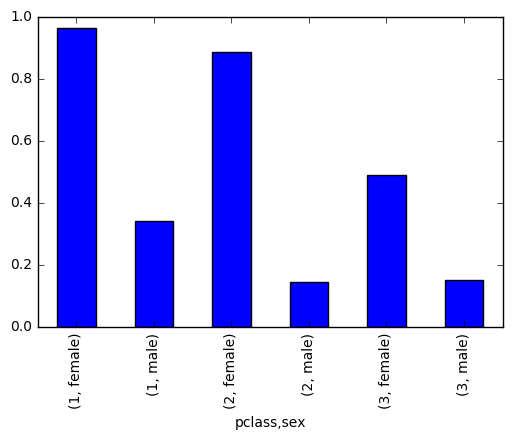

In [18]:
titanic_df.groupby("pclass").mean()
class_sex_grouping = titanic_df.groupby(["pclass", "sex"]).mean()
class_sex_grouping["survived"].plot.bar()

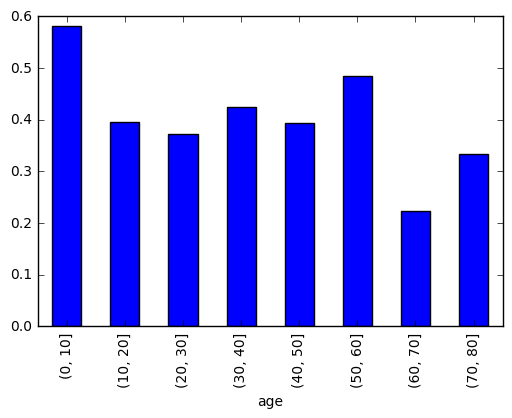

In [35]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0,90,10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping["survived"].plot.bar()

In [66]:
#titanic_df = titanic_df.drop(["body", "boat", "cabin"], axis = 1)
#titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
titanic_df = titanic_df.dropna()
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [80]:
def preprocess_titanic_df(df):     
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(["home.dest", "ticket", "name"], axis = 1)
    return processed_df
preprocess_titanic_df(titanic_df)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2
5,1,1,1,48.0000,0,0,26.5500,2
6,1,1,0,63.0000,1,0,77.9583,2
7,1,0,1,39.0000,0,0,0.0000,2
8,1,1,0,53.0000,2,0,51.4792,2
9,1,0,1,71.0000,0,0,49.5042,0


In [89]:
X = processed_df.drop(["survived"], axis = 1).values
y = processed_df["survived"].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size= 0.2)

In [94]:
clf_dt = tree.DecisionTreeClassifier(max_depth= 10)
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.75598086124401909

In [95]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), 
n_iter = 20, test_size=0.2, random_state= 0)

def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv = shuffle_validator)
    print ("Accuracy: %0.4f (+/- %0.2f)" %(scores.mean(), scores.std()))
    
    

In [101]:
test_classifier(clf_dt)

Accuracy: 0.7727 (+/- 0.02)


In [100]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7794 (+/- 0.03)


In [102]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8201 (+/- 0.02)


In [103]:
eclf = ske.VotingClassifier([("dt",clf_dt ), ("rf", clf_rf), ("gb", clf_gb)])
test_classifier(eclf)

Accuracy: 0.8050 (+/- 0.02)


In [130]:
#tf_clf_nn = skflow.DNNClassifier(hidden_units=[20, 40, 20], n_classes=2, 
#feature_columns= tf.contrib.layers.real_valued_column("", dimension=4))
#tf_clf_nn.fit(X_train, y_train)

In [132]:
def custom_model(X, y):
    layers = skflow.(X, [20, 40, 20], tf.tanh)
    return skflow.models.logistic_regression(layers, y)
tf_clf_c = skflow.DNNClassifier(hidden_units=[20, 40, 20], n_classes=2, 
    feature_columns= tf.contrib.layers.real_valued_column("", dimension=4))
tf_clf_c.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-132-bea63f434c65>, line 2)

In [90]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)

In [92]:
clf_df = tree.DecisionTreeClassifier(max_depth=10)

In [94]:
clf_df.fit(X_train, y_train)
clf_df.score(X_test, y_test )

0.76555023923444976

In [99]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter = 20, test_size = 20, random_state= 0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv= shuffle_validator)
    print("Accuracy: %0.4f(+/-%0.2f)"%(scores.mean(), scores.std()))
test_classifier(clf_df)

Accuracy: 0.7575(+/-0.07)


In [101]:
clf_rf = ske.RandomForestClassifier(n_estimators = 50)
test_classifier(clf_rf)

Accuracy: 0.7925(+/-0.07)


In [106]:
clf_gb = ske.GradientBoostingClassifier(n_estimators = 50)
test_classifier(clf_gb)

Accuracy: 0.8125(+/-0.07)


In [107]:
eclf = ske.VotingClassifier([("dt", clf_df), ("rf", clf_rf), ("gb", clf_gb)])
test_classifier(eclf)

Accuracy: 0.8125(+/-0.05)


In [139]:
#tf_clf_dnn = learn.DNNClassifier.fit(hidden_units = [20,40,20],n_classes = 2, steps = 1000)
#tf_clf_dnn = learn.DNNClassifier(feature_columns = hidden_units = [20,40,20],n_classes = 2)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.05)
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
tf_clf_dnn = tf.contrib.learn.DNNClassifier(feature_columns = feature_columns, 
                                            hidden_units = [20,40,20], 
                                             n_classes=3,optimizer=optimizer)

tf_clf_dnn.fit(X_train, y_train)
tf_clf_dnn.score(X_test,y_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, 'save_checkpoints_steps': None, 'keep_checkpoint_max': 5, 'save_checkpoints_secs': 600, '_environment': 'local', 'tf_random_seed': None, '_task_id': 0, '_master': '', 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_type': None, '_evaluation_master': '', '_num_ps_replicas': 0, 'keep_checkpoint_every_n_hours': 10000, 'save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x124404c50>}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_si

KeyboardInterrupt: 

In [130]:
def custom_model(X, y):
    layers = learn.ops.dnn(X, [20, 40, 20], tf.tanh)
    return learn.models.logistic_regression(layers, y)


In [131]:
tf_clf_c = learn.Tensor(model_fn=custom_model, n_classes=2, batch_size=256, steps=1000, learning_rate=0.05)
tf_clf_c.fit(X_train, y_train)
metrics.accuracy_score(y_test, tf_clf_c.predict(X_test))


AttributeError: module 'tensorflow.contrib.learn' has no attribute 'TensorFlowEstimator'